<a id='Google-Mobility-Data'></a>

## Google Mobility Data

[[ go back to the top ]](#Table-of-contents)

This dataset contains just over a year's worth of daily-frequency data from six sub-categories ("Indicators") in the United States. A total of 382 records, aggregated across county and state levels, were collected from 2020-02-15 to 2021-03-02 (YYYY-MM-DD). Each mobility indicator is measured as percent change from baseline.

From the official documentation website ([source](https://www.google.com/covid19/mobility/data_documentation.html?hl=en)):

Baseline

*    The median value, for the corresponding day of the week, during the 5-week period Jan 3–Feb 6, 2020.

**Place Categories**

|Indicator|Data Type|Dataset|Region-Frequency|Description|
|---|---|---|---|---|
|**Grocery & Pharmacy**|*float*|Google Mobility|U.S. Daily|Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.|
|**Parks**|*float*|Google Mobility|U.S. Daily|Mobility trends for places like local parks, national parks, public beaches, marinas, dog parks, plazas, and public gardens.|
|**Transit Stations**|*float*|Google Mobility|U.S. Daily|Mobility trends for places like public transport hubs such as subway, bus, and train stations.|
|**Retail & Recreation**|*float*|Google Mobility|U.S. Daily|Mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.|
|**Residential**|*float*|Google Mobility|U.S. Daily|Mobility trends for places of residence.|
|**Workplaces**|*float*|Google Mobility|U.S. Daily|Mobility trends for places of work.|

#### Load Data

In [2]:
# The file path may change depending on the final Team Repo organization
df = pd.read_csv('../../data/Transportation/google/baseline_pct_change.csv',
                 index_col = 'date',
                 parse_dates = ['date'],
                 infer_datetime_format = True)
df.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 382 entries, 2020-02-15 to 2021-03-02
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   workplaces             382 non-null    float64
 1   retail_and_recreation  382 non-null    float64
 2   grocery_and_pharmacy   382 non-null    float64
 3   residential            382 non-null    float64
 4   transit_stations       382 non-null    float64
 5   parks                  382 non-null    float64
dtypes: float64(6)
memory usage: 20.9 KB


#### Add Calculated Columns

Some important metrics can be calculated and included in the modeling.

In [3]:
#df['new_column'] = df.column1 - df.column2
#df.head()

## Data Exploration

[[ go back to the top ]](#Table-of-contents)

In [4]:
df.describe()

workplaces  retail_and_recreation  grocery_and_pharmacy  residential  \
count  382.000000             382.000000            382.000000   382.000000   
mean   -22.582403             -11.547427             -0.750976     7.838999   
std     12.494321              12.966475              9.261214     4.901552   
min    -81.157165             -85.804245            -63.582004    -2.083620   
25%    -28.958435             -18.120157             -5.323603     5.010812   
50%    -22.300172              -9.899883             -1.259989     7.433015   
75%    -14.448762              -3.747269              4.685063     9.709659   
max      3.791012              19.652863             32.806560    26.579684   

       transit_stations       parks  
count        382.000000  382.000000  
mean         -14.317257   24.251034  
std           11.531974   32.598749  
min          -51.829450  -33.880145  
25%          -21.973824   -2.112958  
50%          -13.917977   18.261794  
75%           -5.995699   51.333475  
max           14.546265   95.621185

> *Observations*
>
> Notice: We do not have to deal with missing values. However, all mobility indicators seems to have tailed off extreme values. 

## Visualizations

[[ go back to the top ]](#Table-of-contents)

In [5]:
plt.rcParams["figure.figsize"] = (20,20)
plt.style.use('seaborn')

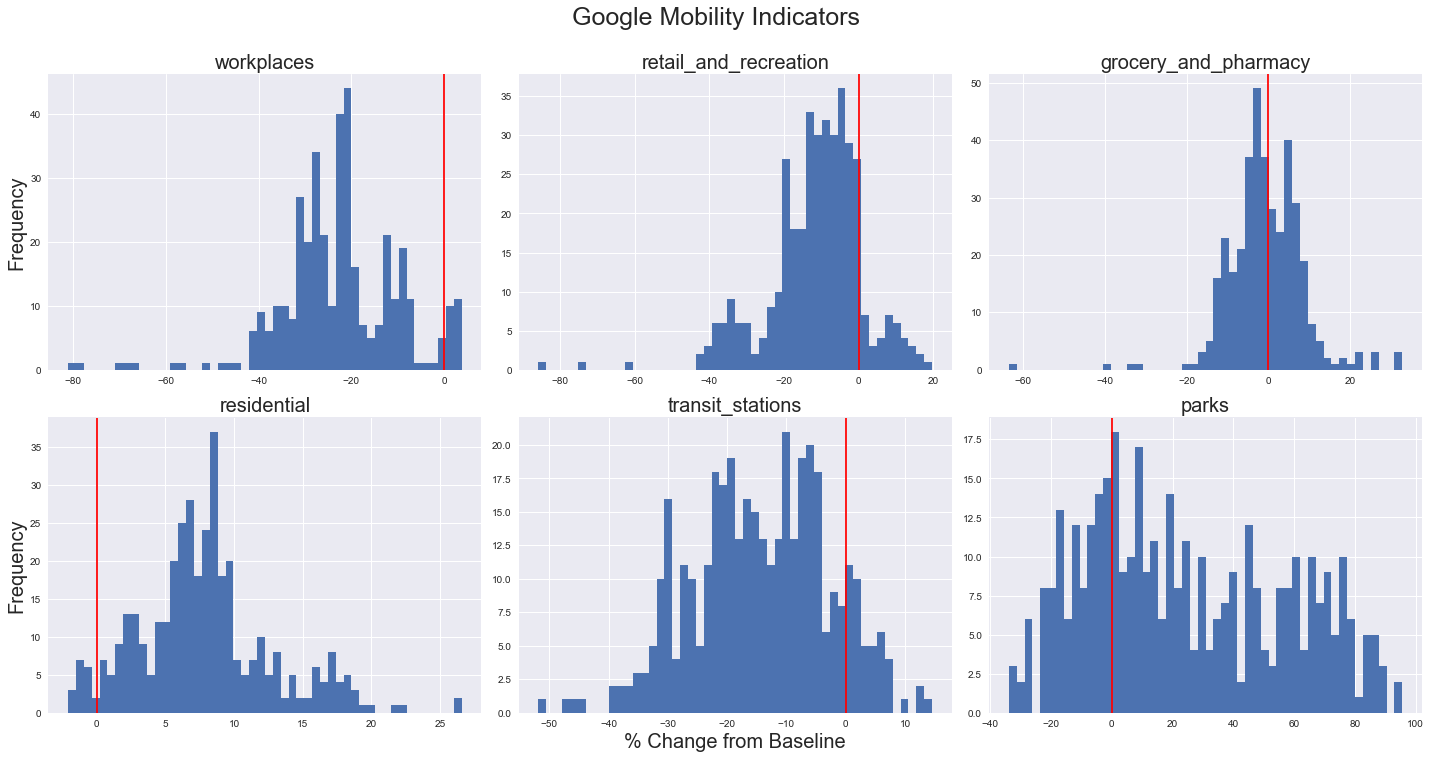

In [6]:
nrows, ncols, nbins = 2, 3, 50

fig, ax = plt.subplots(nrows, ncols, figsize=(20,10))
count, label_size = 0, 20
col_list = list(df.columns)

for row in range(nrows):
    for col in range(ncols):
        series = df[col_list[count]]
        ax[row][col].hist(series, bins = nbins)
        ax[row][col].set_title(col_list[count], fontsize = label_size)
        ax[row][col].axvline(x=0, color= 'r')
        count+=1
    ax[row][0].set_ylabel('Frequency', fontsize = label_size)   
ax[1][1].set_xlabel('% Change from Baseline', fontsize = label_size)
plt.suptitle('Google Mobility Indicators', y = 1.05, fontsize = label_size+5)
plt.tight_layout()

> *Observations*
>
> By plotting the histogram of mobility, we can see the characteristic distribution of each indicator.
> - Mobility trends around workplaces are predominantly negative indicating lower mobility relaitive to the baseline, and seem to center around minus 20%. There are also scattered values between -80 to -40 percent-change that require further cleaning/investigation for interpretation.
> - Mobility around places of retail, restaurants, and recreation contain many extreme low values which may pose problems in downstream analysis. 
> - Mobility trends around parks and places of residence seem to be mostly positive with two overlapping peaks in parks. 
> - Mobility around markets and drug stores seem to be centered around 0% change (in contrast to all other indicators), however, both ends seems to have scattered extreme values that may require further investigation.

### Look at a Zoomed-In Window

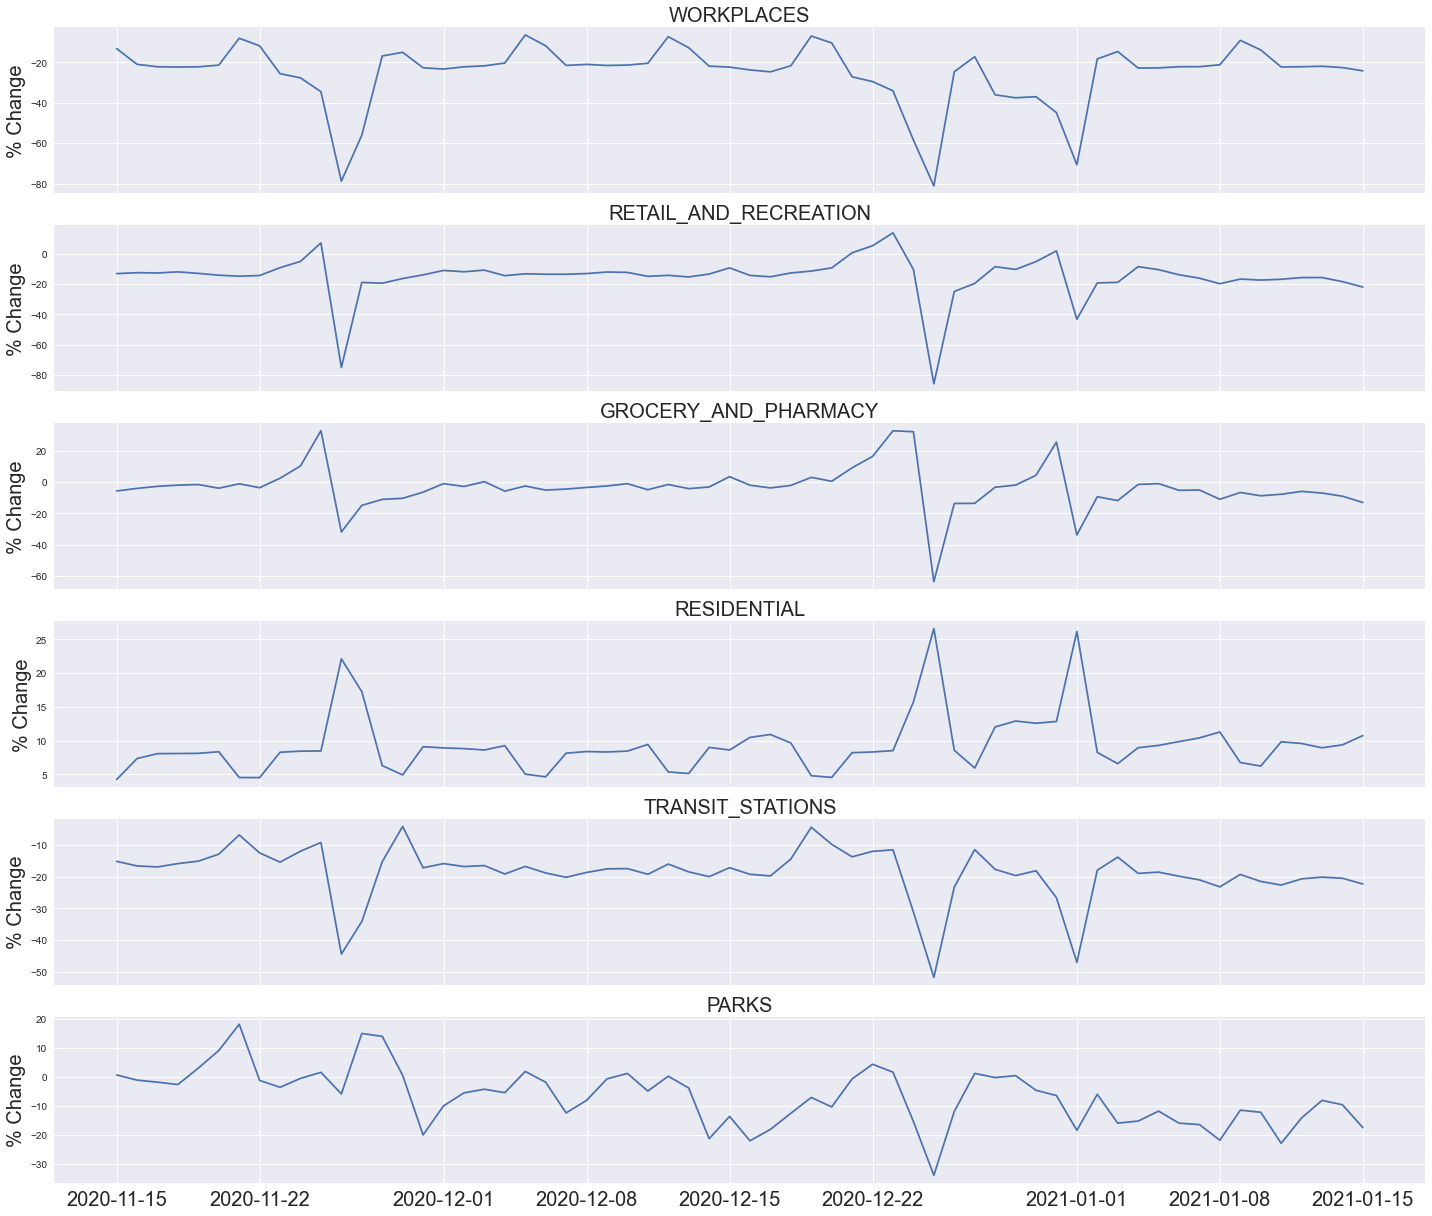

In [7]:
nrows, ncols = 6, 1
fig, ax = plt.subplots(nrows, ncols, figsize=(20,17), squeeze=False, sharex=True)

# Choose range of interest
start = '2020-11-15'
end = '2021-01-15'
count, label_size = 0, 20
col_list = list(df.columns)

for row in range(nrows):
    for col in range(ncols):
        series = df.loc[start:end, col_list[count]]
        ax[row][col].plot(series)
        ax[row][col].set_title(col_list[count].upper(), fontsize = label_size)
        count+=1
    ax[row][0].set_ylabel('% Change', fontsize = label_size)

plt.xticks(fontsize =label_size)
plt.tight_layout()

> *Observations*
> 
> When zoomed into the "holiday season", we can see the relationship between the mobility trends more clearly. The peaks in residential data show the private celebrations held by Americans around Thanksgiving, Christmas, and the New Year. These are the %-changes compared to a non-holiday baseline so it is expected that all other indicators would display a downward spiking mobility trend. Distinct cyclic behavior in workplace mobility is evident weekly, and appears to correspond with dips in residential mobility. This could be an indication of data-seasonality which will hinder series stationarity if left untreated.

### Look at the Entire Data

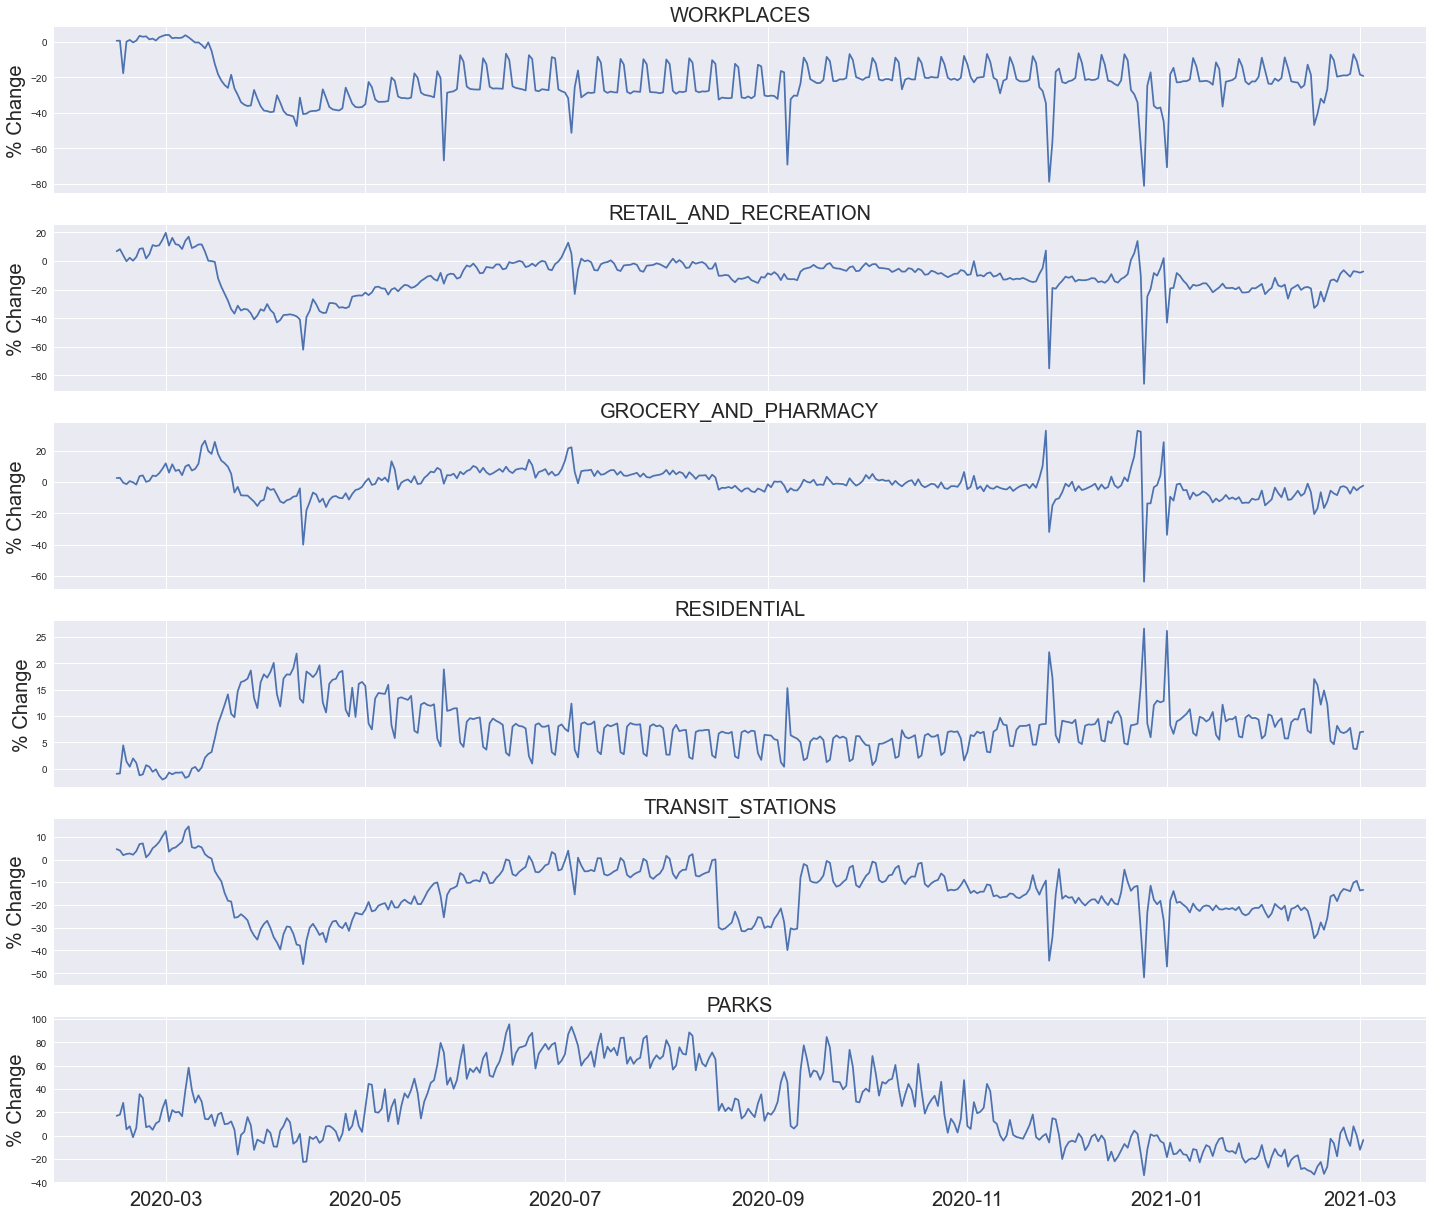

In [8]:
#nrows, ncols = 6, 1
fig, ax = plt.subplots(nrows = 6,
                       ncols = 1,
                       figsize=(20,17), 
                       squeeze=False, # Make it all fit
                       sharex=True, # Make toggle switch
                       sharey=False) # Make User Input and toggle

# Choose range of interest
start = '2020-02-15'
end = '2021-03-02'
count, label_size = 0, 20
col_list = list(df.columns)

for row in range(nrows):
    for col in range(ncols):
        series = df.loc[start:end, col_list[count]]
        ax[row][col].plot(series)
        ax[row][col].set_title(col_list[count].upper(), fontsize = label_size)
        count+=1
    ax[row][0].set_ylabel('% Change', fontsize = label_size)

plt.xticks(fontsize =label_size)
plt.tight_layout()

> *Observations*
>
> A full year's worth of daily data is too condensed. Although some significant impacts such as national holidays and government enforced shutdowns can be identified, it's quite difficult to obtain actionable insights from the entire dataset. Big-picture insights can be extracted from subtle variations in the data after further processing.


## Resampling

[[ go back to the top ]](#Table-of-contents)

In [9]:
def resample_rolling(data = df, d = 7, f = 'W'):
    # Figsize probably needs to be generalized to remove hardcoded dimensions
    fig, axs = plt.subplots(nrows = 2,
                            ncols = 1,
                            sharex= True,
                            sharey=True,
                            figsize=(14,8))
    days = d
    freq = f
    df_0 = data
    
    # Resample
    df_m = df_0.resample(freq).mean()
    # Rolling mean: Mean of a moving window across time periods, smoothing
    df_rm = df_0.rolling(days).mean()
    
    #sns.lineplot(data = df_0, ax = axs[0]);
    sns.lineplot(data = df_m, ax = axs[0], legend = False);
    
    #sns.lineplot(data = df_0, ax = axs[1]);
    sns.lineplot(data= df_rm, ax = axs[1], legend = 'full');
    
    plt.suptitle('Percent Change from "Baseline', fontsize = label_size)
    #axs[0].xticks(fontsize =label_size), plt.yticks(fontsize =label_size)
    #axs[0].get_legend().remove()
    axs[1].legend(fontsize = 13,
                  #loc='best',
                  bbox_to_anchor=(0.5, 0.6, 0.5, 0.1)) # (x, y, width, height)
    plt.tight_layout()
    return

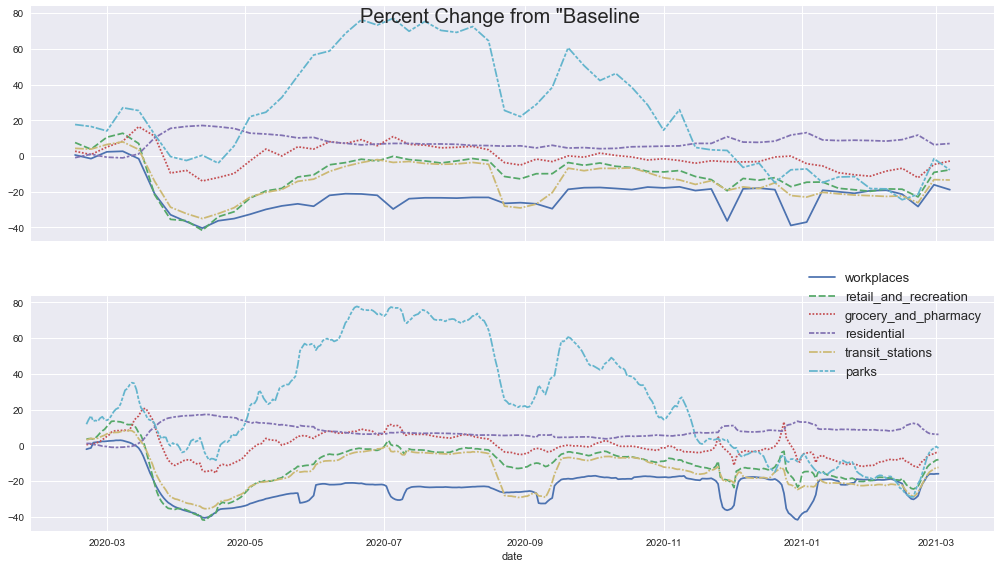

In [10]:
# Default is 7-days (one week = 'W')
resample_rolling()

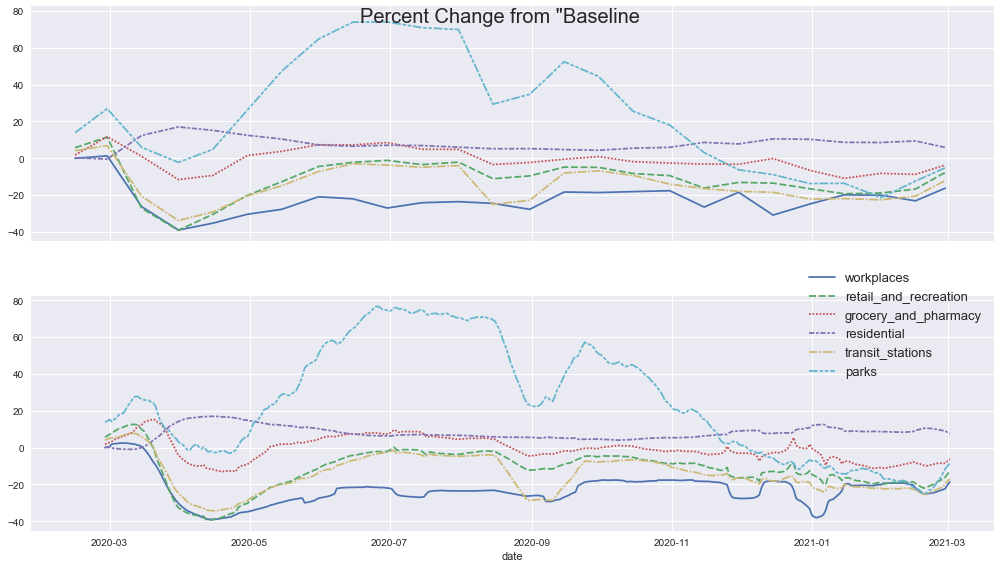

In [11]:
resample_rolling(d=14, f='SM')

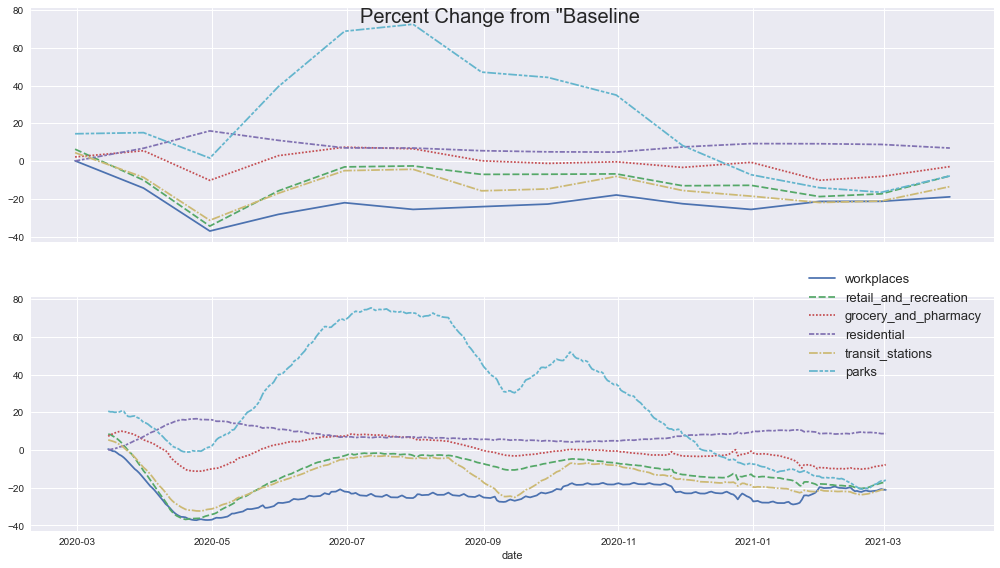

In [12]:
resample_rolling(d=30, f='M');

> *Observations*
>
> We can clearly see a downward trend in parks mobility when the winter months bring less favorable outdoor weather. Currently, it can be seen that all mobility indicators are converging together slightly lower than this time last year except, notably, residential mobility trends remain steadily around 10% higher. This visualization allows us to quickly identify intervals for close inspection, aiding in an abnormality analysis.
>
> **The rest of the analysis, will focus on working with the resampled mobility data**

In [13]:
#resample_rolling(d=90, f='Q')
#resample_rolling(d=180, f='BA')
#resample_rolling(d=365, f='Y')
freq = 'W'
df_r = df.resample(freq).mean()

The data will be subset up until 2020-08-08 where the mobility was relative stable for model building and analysis. The latter part of the data shows sharp spikes that may be result of government shutdowns, holidays, etc. which might not suitable for time-series modeling.

## Decomposition

[[ go back to the top ]](#Table-of-contents)

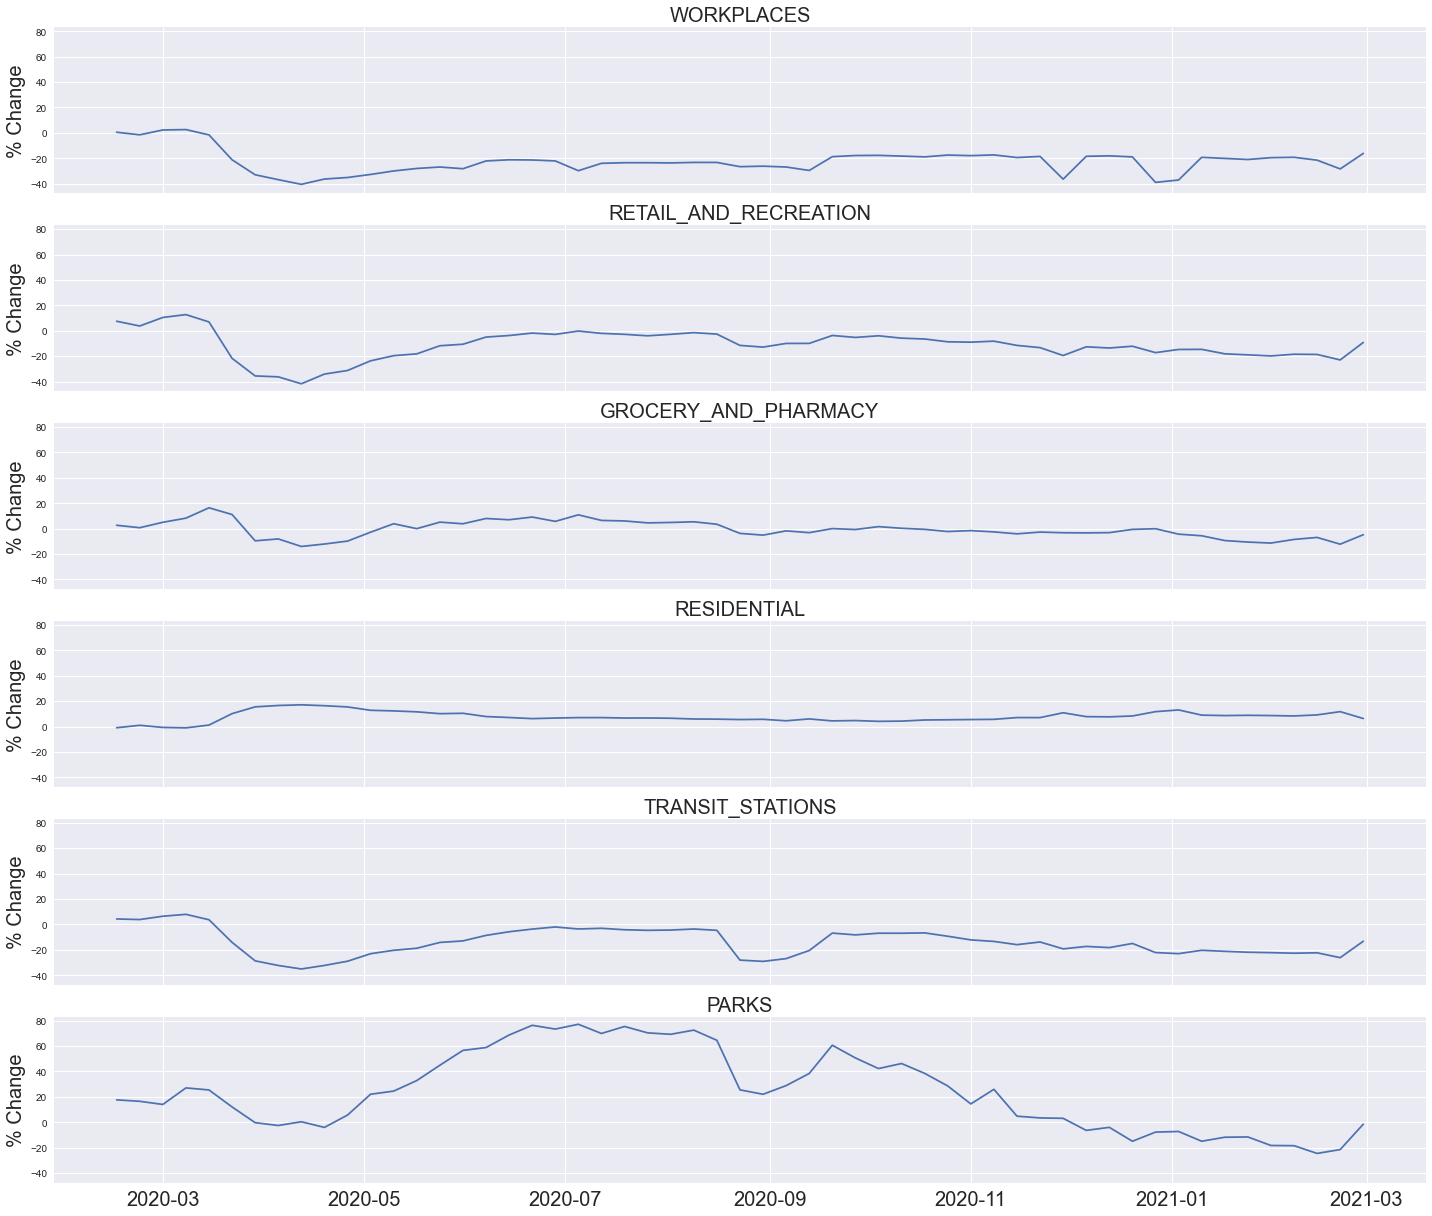

In [14]:
fig, ax = plt.subplots(nrows = 6,
                       ncols = 1,
                       figsize=(20,17),
                       squeeze=False,
                       sharey = True,
                       sharex=True)

# Choose time-series subset(date range of interest)
start = '2020-02-15' # '2020-02-15' first date
end = '2021-03-02'
count, label_size = 0, 20
col_list = list(df.columns)

for row in range(nrows):
    for col in range(ncols):
        series = df_r.loc[start:end, col_list[count]]
        ax[row][col].plot(series)
        ax[row][col].set_title(col_list[count].upper(), fontsize = label_size)
        count+=1
    ax[row][0].set_ylabel('% Change', fontsize = label_size)
plt.xticks(fontsize =label_size)
plt.tight_layout()

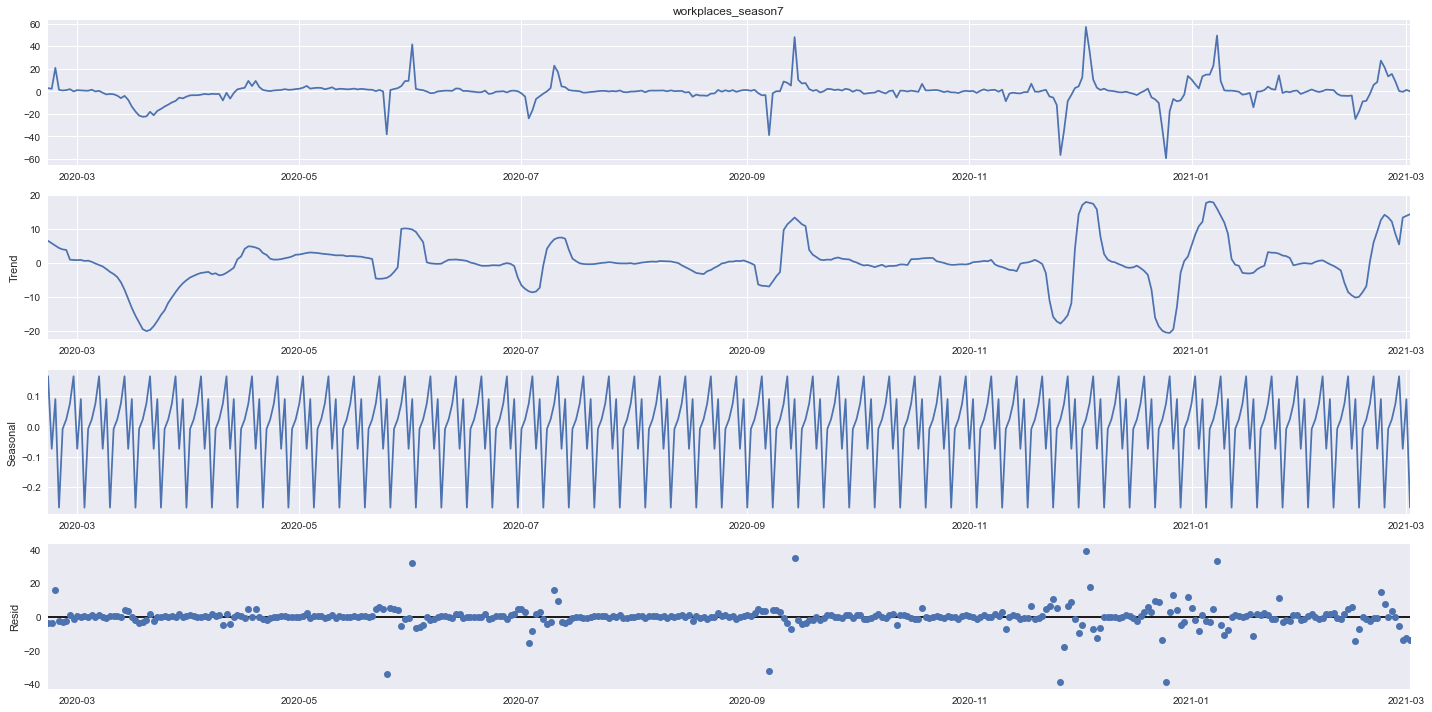

In [27]:
# Decompose time-series into Trend, Seasonality and Residuals
col_list = list(work_diff.columns)
for col_i in range(len(list(work_diff.columns))):
    decomposed = sm.tsa.seasonal_decompose(work_diff[col_list[col_i]],
                                           model = 'additive',
                                           extrapolate_trend='freq')
    plt.rc("figure", figsize=(20,10))
    fig = decomposed.plot()
    plt.grid()
    
    # Three time-series components
    trend = decomposed.trend
    seasonal = decomposed.seasonal
    # residuals = [ Observed - (trend + seasonality) ]
    residual = decomposed.resid

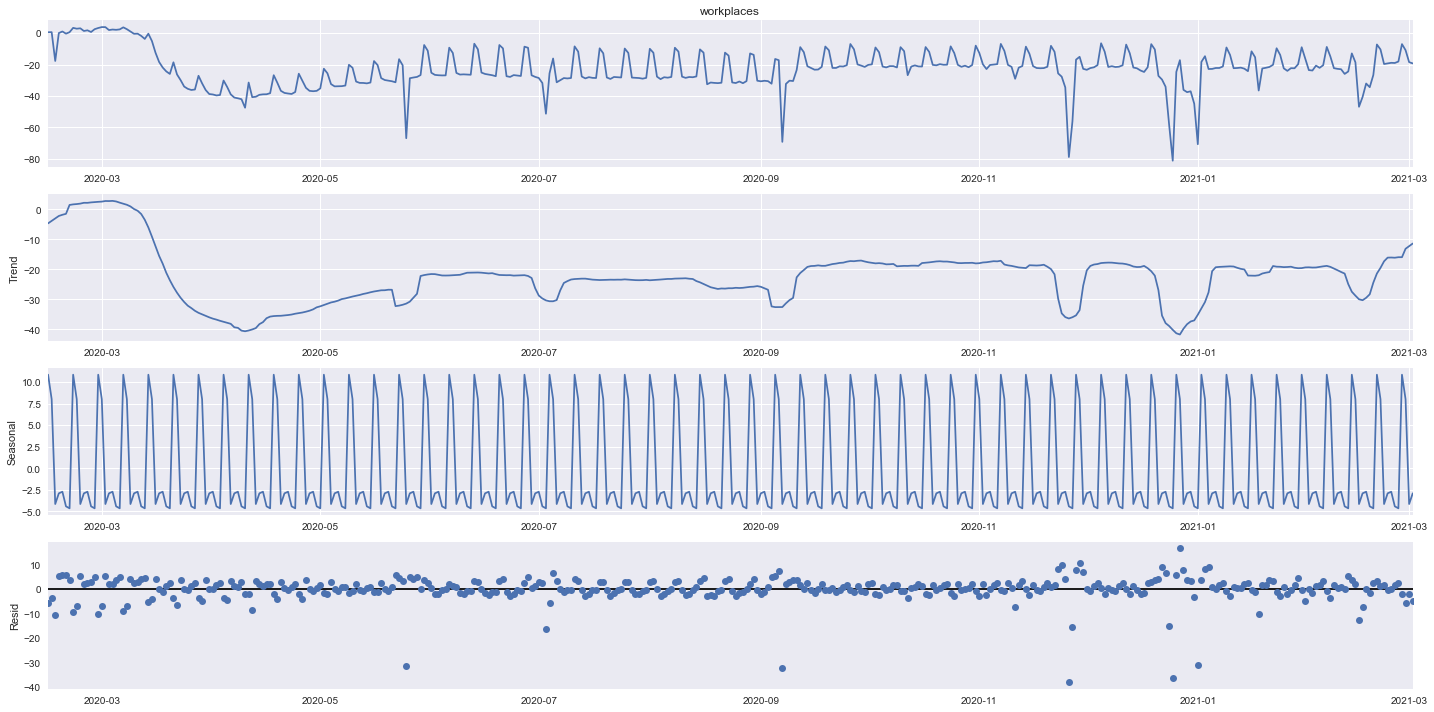

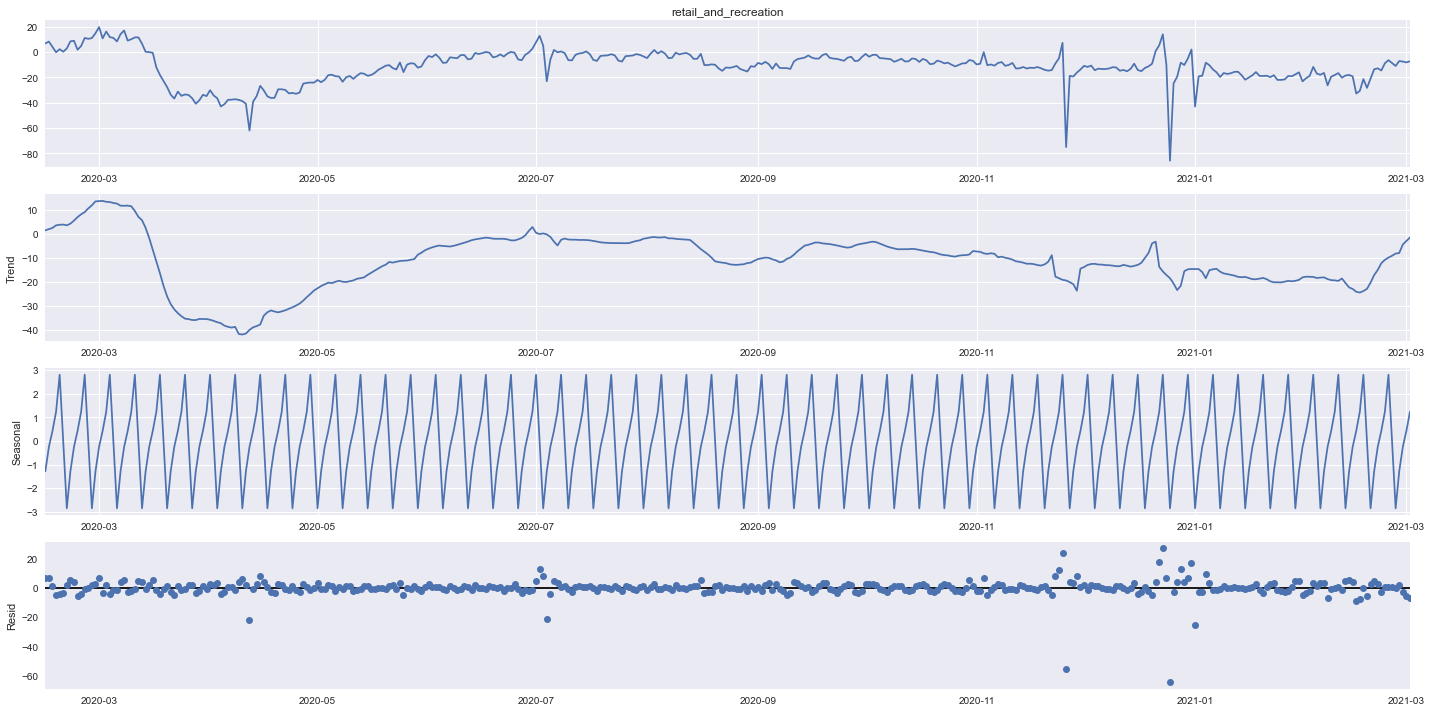

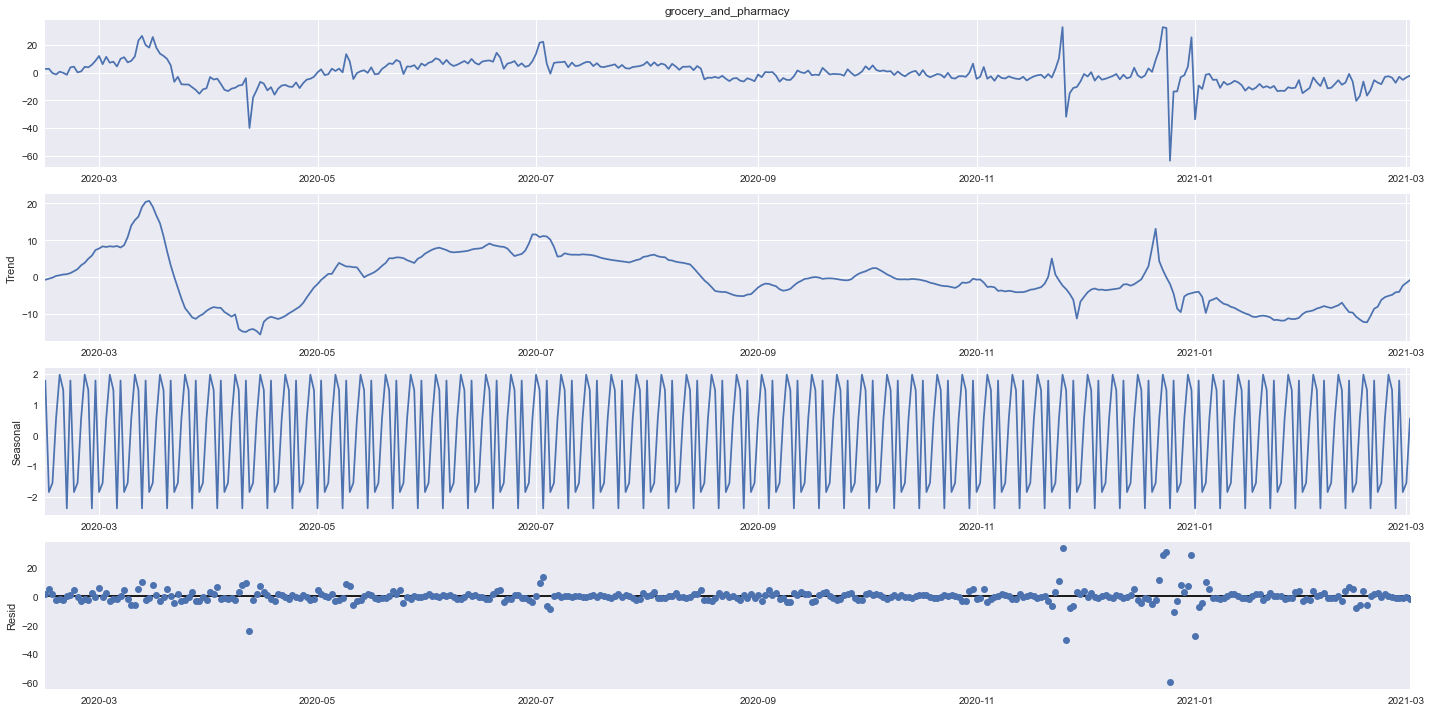

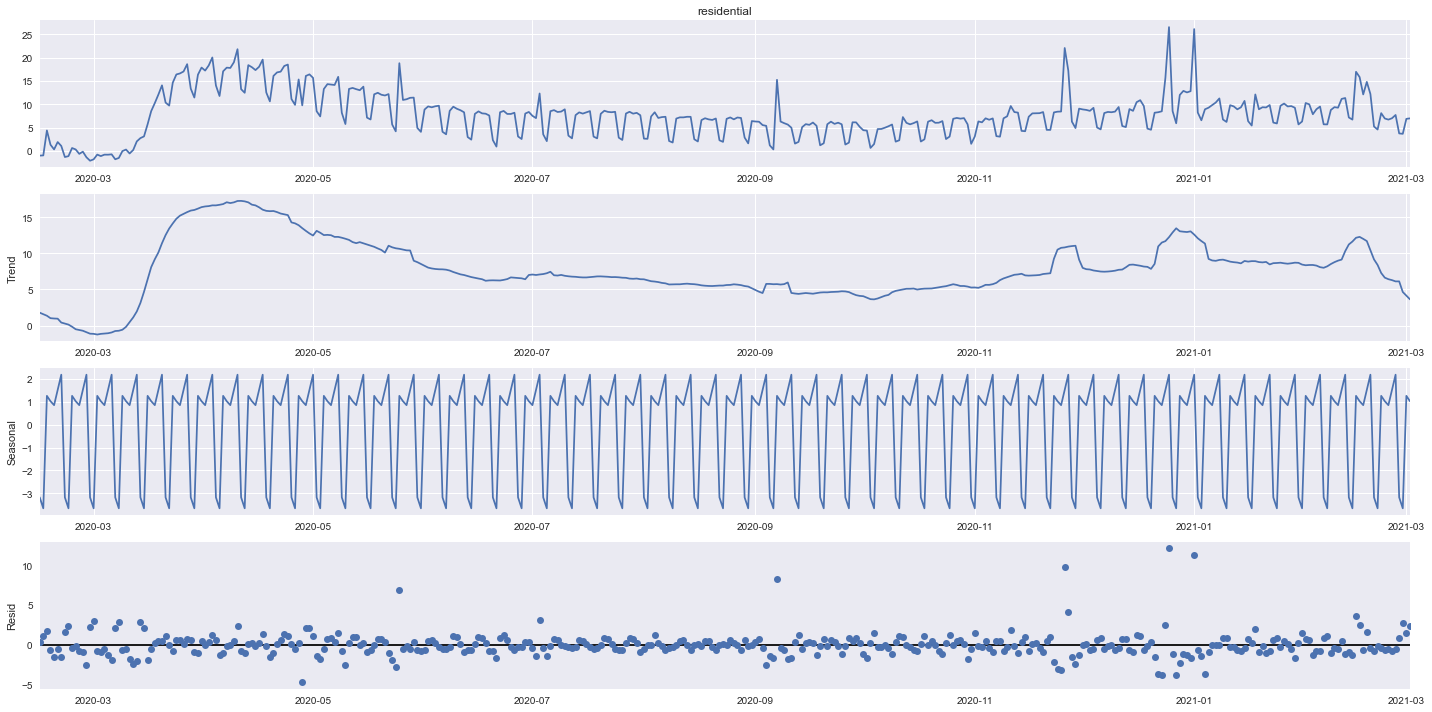

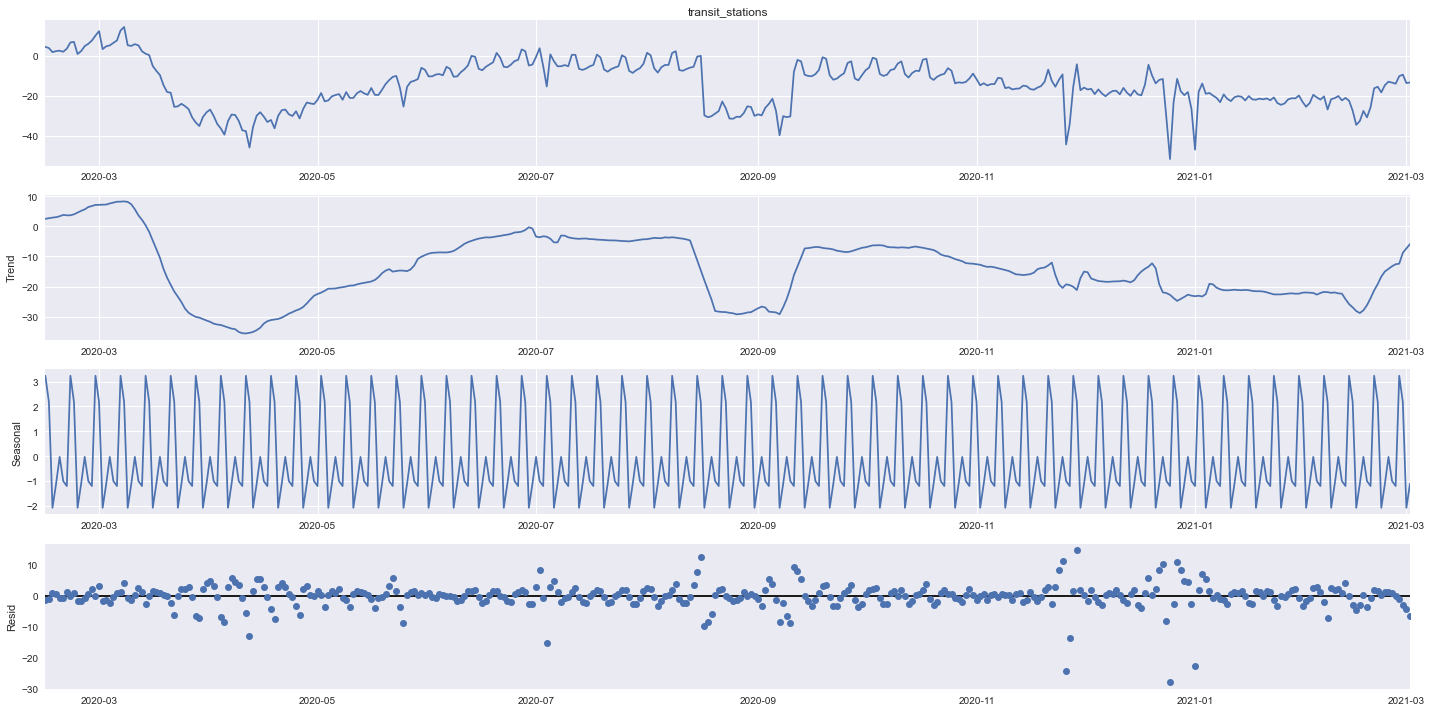

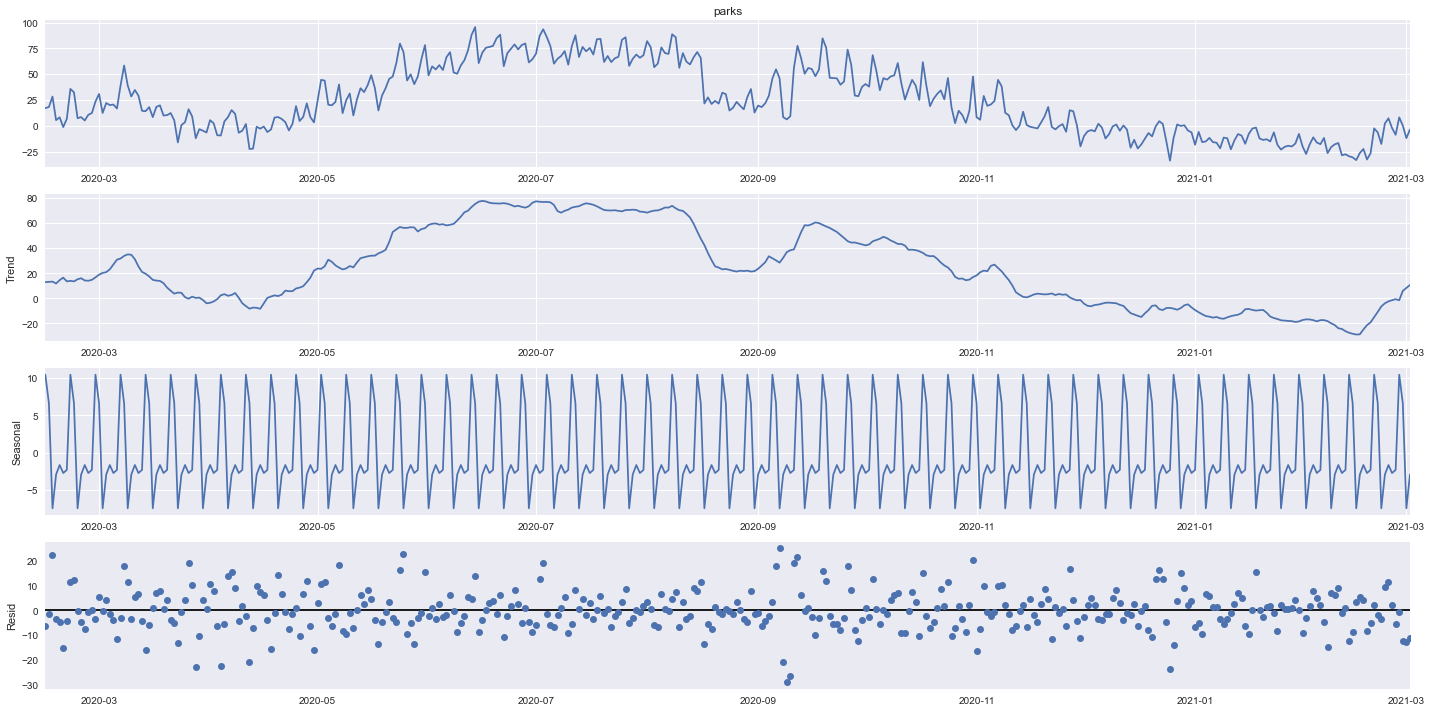

In [15]:
# Decompose time-series into Trend, Seasonality and Residuals
col_list = list(df.columns)
for col_i in range(len(list(df.columns))):
    decomposed = sm.tsa.seasonal_decompose(df[col_list[col_i]], model = 'additive', extrapolate_trend='freq')
    plt.rc("figure", figsize=(20,10))
    fig = decomposed.plot()
    plt.grid()
    
    # Three time-series components
    trend = decomposed.trend
    seasonal = decomposed.seasonal
    # residuals = [ Observed - (trend + seasonality) ]
    residual = decomposed.resid

> *Observations*
>
> With the data decomposed, mobility trends are noticeably short lived. A consistent downward trend is evident, for all indicators other than the increasing-residential and the steady-workplace indicators, from October 2020 through January 2021 (most recent 4 months). The seasonal aspect of the data may or may not be statistically significant, but a more conservative approach handling suggested seasonality may be apropriate. In particular, the Workplaces and Residential Mobilities may benefit from seasonal adjustment with differencing

## Time Series Stationarity


[[ go back to the top ]](#Table-of-contents)

__Check if the time series is stationarity or not:__

1. __Rolling Statistics__: Plot the moving average & moving variance, check if either vary in time.

2. __Augmented Dickey-Fuller Test:__ A statistical test for checking stationarity.
  - Null Hypothesis (H0): the time-series is NON-stationary. <br>
  - Alternate Hypothesis (H1): Reject H0, the time-series is STATIONARY.
> p-value >  threshold: FAIL to reject H0, data is NON-stationary. <br>
> p-value<= threshold: Reject H0, the data is STATIONARY.

NOTE: Most commonly: Threshold = 0.05

Reference: https://otexts.com/fpp2/stationarity.html

In [72]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    roll_mean = timeseries.rolling(window=10).mean()
    roll_std = timeseries.rolling(window=10).std()
    #Plot rolling statistics:
    plt.figure(figsize = (20,5))
    obs = plt.plot(timeseries, color='blue', label= f'Observed-Series: {col_list[col_i]}')
    rmean = plt.plot(roll_mean, color='red', label='Rolling-Mean')
    rstd = plt.plot(roll_std, color='black', label = 'Rolling-Stdev')
    # Formatting
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.ylabel('Change (%)')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print (f'Results of Dickey-Fuller Test: {col_list[col_i]}')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    print()

In [75]:
col_list = list(work_diff.columns)
for col_i in range(len(col_list)):
    test_stationarity(work_diff[col_list[col_i]])

Results of Dickey-Fuller Test: workplaces_season7
Test Statistic                  -4.526633
p-value                          0.000176
#Lags Used                      14.000000
Number of Observations Used    360.000000
Critical Value (1%)             -3.448646
Critical Value (5%)             -2.869602
Critical Value (10%)            -2.571065
dtype: float64



Results of Dickey-Fuller Test: workplaces
Test Statistic                  -3.707978
p-value                          0.004002
#Lags Used                      14.000000
Number of Observations Used    367.000000
Critical Value (1%)             -3.448294
Critical Value (5%)             -2.869448
Critical Value (10%)            -2.570983
dtype: float64



Results of Dickey-Fuller Test: retail_and_recreation
Test Statistic                  -2.590090
p-value                          0.095063
#Lags Used                       9.000000
Number of Observations Used    372.000000
Critical Value (1%)             -3.448052
Critical Value (5%)             -2.869341
Critical Value (10%)            -2.570926
dtype: float64



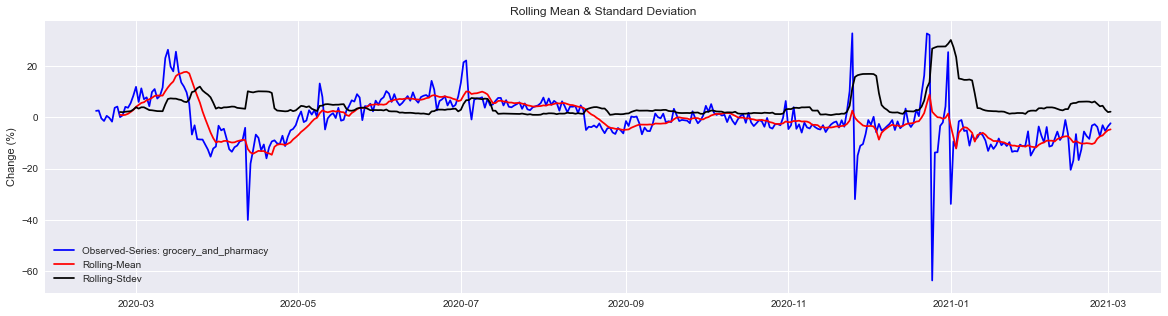

Results of Dickey-Fuller Test: grocery_and_pharmacy
Test Statistic                  -2.561505
p-value                          0.101217
#Lags Used                       6.000000
Number of Observations Used    375.000000
Critical Value (1%)             -3.447909
Critical Value (5%)             -2.869278
Critical Value (10%)            -2.570892
dtype: float64



Results of Dickey-Fuller Test: residential
Test Statistic                  -3.059535
p-value                          0.029696
#Lags Used                      14.000000
Number of Observations Used    367.000000
Critical Value (1%)             -3.448294
Critical Value (5%)             -2.869448
Critical Value (10%)            -2.570983
dtype: float64



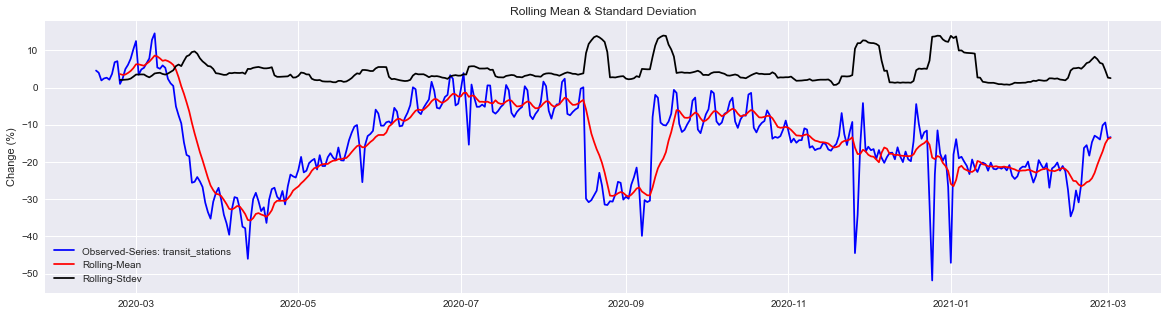

Results of Dickey-Fuller Test: transit_stations
Test Statistic                  -2.745256
p-value                          0.066529
#Lags Used                       7.000000
Number of Observations Used    374.000000
Critical Value (1%)             -3.447956
Critical Value (5%)             -2.869299
Critical Value (10%)            -2.570903
dtype: float64



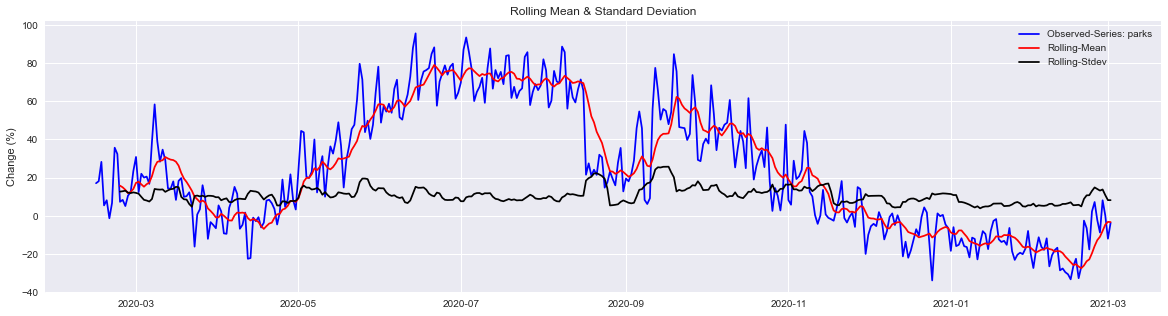

Results of Dickey-Fuller Test: parks
Test Statistic                  -1.454438
p-value                          0.555918
#Lags Used                      14.000000
Number of Observations Used    367.000000
Critical Value (1%)             -3.448294
Critical Value (5%)             -2.869448
Critical Value (10%)            -2.570983
dtype: float64



In [74]:
col_list = list(df.columns)
for col_i in range(len(list(df.columns))):
    test_stationarity(df[col_list[col_i]])

> **Insights**
>
> Without further processing, the trends in retail, grocery, transit, and parks mobilities are not stationary. This is identified by the observable trends in rolling 10-day means(red) and acceptance of the "Dickey-Fuller H0's" that the mobility indicators are not stationary(p-value > 0.05). In particular, H0 is rejected for mobility trends around workplaces and places of residence (p-value < 0.05). Additionally, each mobility indicator seems to have a relatively steady variance indicating that the time-series interactions between trend, seasonality, and residual are additive.

## Making Time Series Stationary

### Differencing

[[ go back to the top ]](#Table-of-contents)

In [18]:
# Create a differenced series
def difference(dataset, interval = 1):
    difference = dataset-dataset.shift(interval)
        
    return difference.dropna(inplace= False)

In [19]:
# Seasonal adjustment with differencing
X = df.workplaces.copy()
diff = []
days_in_week = 7
for i in range(days_in_week, len(X)):
    # Differencing by one-week (7 days)
    value = X[i] - X[i - days_in_week]
    items = (str(X.index[i]), value)
    diff.append(items)
work_diff = pd.DataFrame(diff, columns = ['date', 'workplaces_season7'])
work_diff['date'] = pd.to_datetime(work_diff['date'])
work_diff.set_index('date', inplace = True)
plt.plot(work_diff)
plt.title('Workplaces Mobility: 7-Day Seasonally Adjusted differencing')
plt.show()

#### work_diff

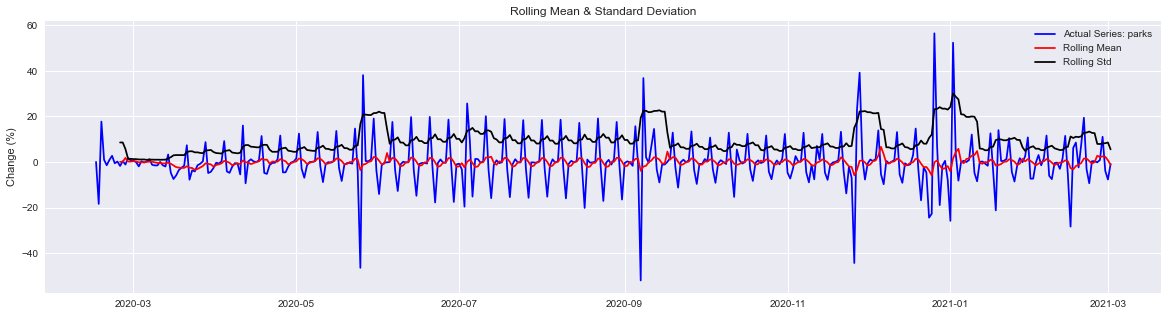

Results of Dickey-Fuller Test: parks
Test Statistic                -6.187794e+00
p-value                        6.227997e-08
#Lags Used                     1.300000e+01
Number of Observations Used    3.670000e+02
Critical Value (1%)           -3.448294e+00
Critical Value (5%)           -2.869448e+00
Critical Value (10%)          -2.570983e+00
dtype: float64



In [20]:
df_differenced = difference(df[['workplaces']])
plt.figure(figsize=(20,5))
plt.plot(df_differenced)
plt.grid()
test_stationarity(df_differenced)

## Autocorrelations and Partial Autocorrelations

[[ go back to the top ]](#Table-of-contents)

In [96]:
## Calculate the ACF and PACF for the flow series up to 20 lags
#df_sub = df[['workplaces']]
# acf_20 = acf(df_sub, nlags=20)
# pacf_20 = pacf(df_sub, nlags=20)
def ACF_PACF_diff(timeseries_df):
    # Draw Plot
    fig, axs = plt.subplots(nrows = 2,
                            ncols = 2,
                            figsize=(20,10),
                            dpi= 100,
                            sharex = True,
                            sharey = True)

    ts = timeseries_df
    plot_acf(ts, lags=20, ax=axs[0][0])
    plot_pacf(ts, lags=20, ax=axs[0][1])

    ts_diff = difference(ts)
    plot_acf(ts_diff, lags=20, ax=axs[1][0])
    plot_pacf(ts_diff, lags=20, ax=axs[1][1])
    axs[1][0].title.set_text('Autocorrelation-Differenced')
    axs[1][1].title.set_text('Partial Autocorrelation-Differenced')
    plt.suptitle(f'{ts.columns[0]} Mobility'.upper(), fontsize = 20)
    return
    #plt.show()

In [98]:
ACF_PACF_diff(df[['residential']])

In [97]:
ACF_PACF_diff(df[['workplaces']])

> *Observations*
>
> Large-positive values for small lags suggest evidence of a trend and a "weekly seasonality" is obviously present in both the non-differenced and the differenced data.

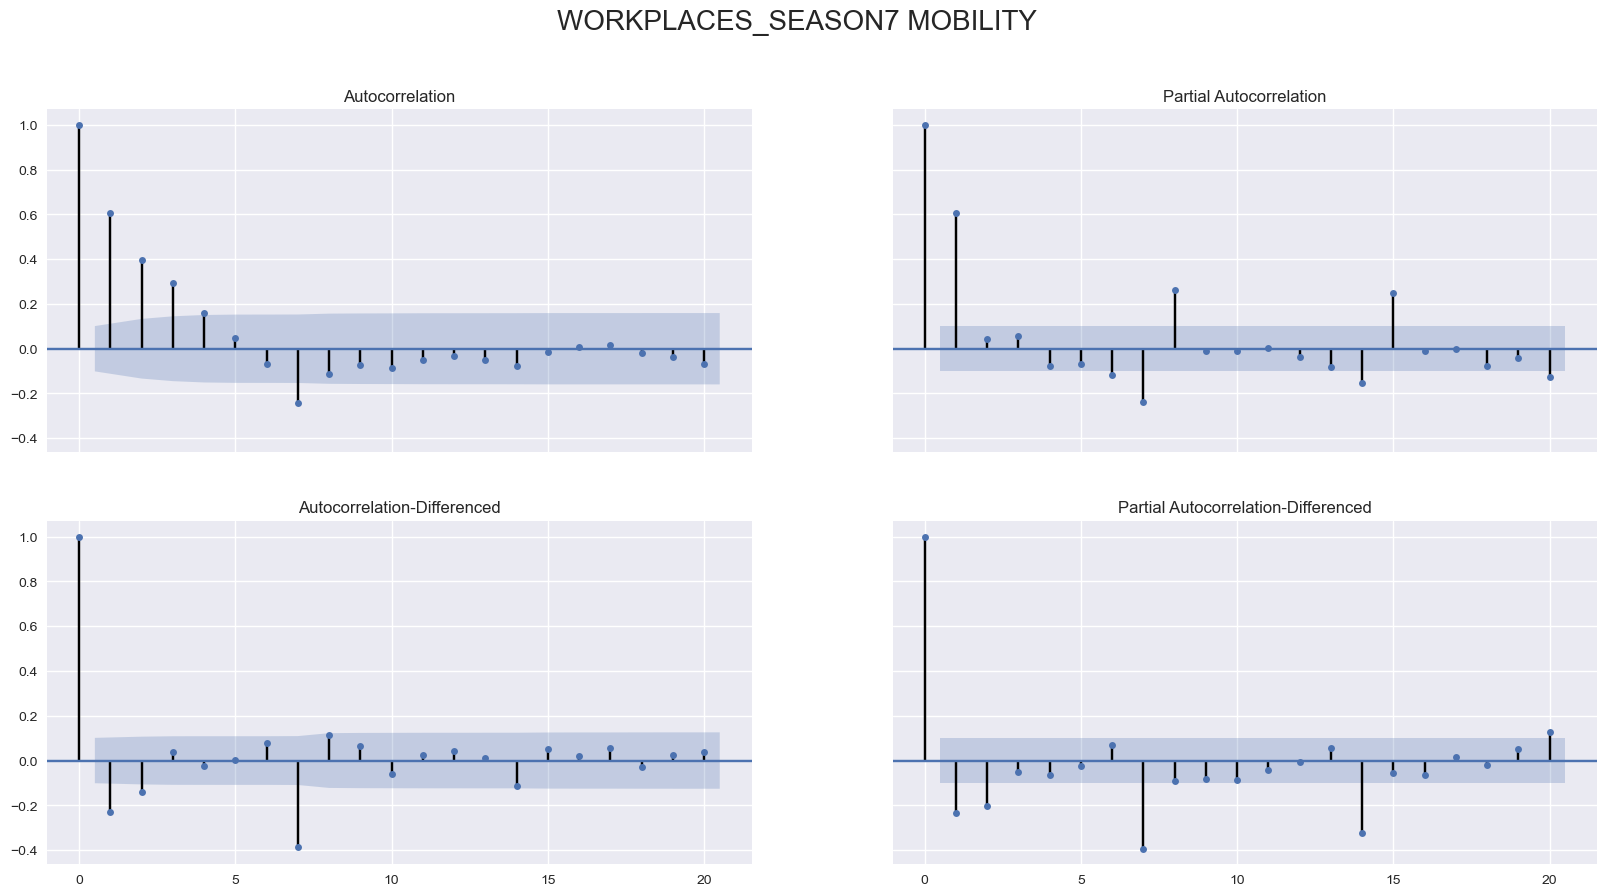

In [100]:
ACF_PACF_diff(work_diff)

> *Observations*
>
> For "Workplace Mobility", the Seasonally-adjusted series' autocorrelations are significant for several lags. The PACF plot has significant spikes only at Lags-1, 7 & 8, therefore all the higher-order autocorrelations are effectively explained by the Lag-1 and weekly lags. We will add these(L-1, L-7, L-8) autocorrelation terms to the forecasting equation.

### ARIMA Modeling

[[ go back to the top ]](#Table-of-contents)

In [23]:
fig, ax = plt.subplots(nrows = 3,
                       ncols = 1,
                       figsize=(20,10), 
                       sharex = True)

df_sub = df[['workplaces']]

# Element-wise subtraction w/ a Series, for set_title("RSS")
df_diff = df_differenced.workplaces

fsize = 15
p = 5; d = 1; q = 1

for nax in range(3):
    if nax == 0:
        # AR Model, choose "p" (p, d = 1, q = 0)
        model = ARIMA(df_sub, order=(p,d,0))
        results_AR = model.fit(disp=-1)
        ax[nax].plot(results_AR.fittedvalues, label = f'AR({p}) Predictions')
        # Residual Sum of Squares
        ax[nax].set_title(f'AR({p}) Model - RSS: %.4f'%sum((results_AR.fittedvalues - df_diff)**2),
                          fontsize = fsize)
        
    elif nax == 1:
        # MA Model, choose "q" (p = 0, d = 1, q)
        model = ARIMA(df_sub, order=(0,d,q))
        results_MA = model.fit(disp=-1)
        ax[nax].plot(results_MA.fittedvalues, label = f'MA({q}) Predictions')
        # Residual Sum of Squares
        ax[nax].set_title(f'MA({q}) Model - RSS: %.4f'%sum((results_MA.fittedvalues - df_diff)**2),
                          fontsize = fsize)
        
    elif nax == 2:
        # ARIMA model, choose "p" & "q" (p, d, q)
        model = ARIMA(df_sub, order=(p,d,q))
        results_ARIMA = model.fit(disp=-1)
        ax[nax].plot(results_ARIMA.fittedvalues, label = f'ARIMA({p},{d},{q}) Predictions')
        # Residual Sum of Squares
        ax[nax].set_title(f'ARIMA({p},{d},{q}) Model - RSS: %.4f'%sum((results_ARIMA.fittedvalues - df_diff)**2),
                          fontsize = fsize)
        
    ax[nax].plot(df_diff, label = 'Original')    
    ax[nax].legend()
    #ax[nax].set_xlabel('Timestamp')
    ax[nax].set_ylabel('Mobility (% Change)', fontsize = fsize)
    
plt.tight_layout()

> *Insights*
>
>

## Conclusion



[[ go back to the top ]](#Table-of-contents)